# K means Silhouette coefficient


In [24]:
# Imports
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# Generate 2D data points
X, _ = make_blobs(
    n_samples=10, centers=3, n_features=2, cluster_std=0.2, random_state=0
)

# Convert the data points into a pandas DataFrame
import pandas as pd

# Generate indicators for the data points
obj_names = []
for i in range(1, 11):
    obj = "Object " + str(i)
    obj_names.append(obj)

# Create a pandas DataFrame with the names and (x, y) coordinates
data = pd.DataFrame({"Object": obj_names, "X_value": X[:, 0], "Y_value": X[:, -1]})

# Preview the data
print(data.head())

     Object   X_value   Y_value
0  Object 1  1.005079  4.594642
1  Object 2  1.128478  4.328122
2  Object 3  2.117881  0.726845
3  Object 4  0.955626  4.385907
4  Object 5 -1.354017  2.769449


In [25]:
# Initialize the centroids
c1 = (-1, 4)
c2 = (-0.2, 1.5)
c3 = (2, 2.5)

In [26]:
# A helper function to calculate the Euclidean diatance between the data
# points and the centroids


def calculate_distance(centroid, X, Y):
    distances = []

    # Unpack the x and y coordinates of the centroid
    c_x, c_y = centroid

    # Iterate over the data points and calculate the distance using the           # given formula
    for x, y in list(zip(X, Y)):
        root_diff_x = (x - c_x) ** 2
        root_diff_y = (y - c_y) ** 2
        distance = np.sqrt(root_diff_x + root_diff_y)
        distances.append(distance)

    return distances

In [27]:
# Calculate the distance and assign them to the DataFrame accordingly
data["C1_Distance"] = calculate_distance(c1, data.X_value, data.Y_value)
data["C2_Distance"] = calculate_distance(c2, data.X_value, data.Y_value)
data["C3_Distance"] = calculate_distance(c3, data.X_value, data.Y_value)

# Preview the data
print(data.head())

     Object   X_value   Y_value  C1_Distance  C2_Distance  C3_Distance
0  Object 1  1.005079  4.594642     2.091397     3.320997     2.318921
1  Object 2  1.128478  4.328122     2.153620     3.124601     2.025236
2  Object 3  2.117881  0.726845     4.520479     2.443428     1.777070
3  Object 4  0.955626  4.385907     1.993339     3.108686     2.155774
4  Object 5 -1.354017  2.769449     1.280462     1.715592     3.364823


In [28]:
# Get the minimum distance centroids
data["Cluster"] = data[["C1_Distance", "C2_Distance", "C3_Distance"]].apply(
    np.argmin, axis=1
)

# Map the centroids accordingly and rename them
data["Cluster"] = data["Cluster"].map(
    {"C1_Distance": "C1", "C2_Distance": "C2", "C3_Distance": "C3"}
)

# Get a preview of the data
print(data.head(10))

      Object   X_value   Y_value  C1_Distance  C2_Distance  C3_Distance  \
0   Object 1  1.005079  4.594642     2.091397     3.320997     2.318921   
1   Object 2  1.128478  4.328122     2.153620     3.124601     2.025236   
2   Object 3  2.117881  0.726845     4.520479     2.443428     1.777070   
3   Object 4  0.955626  4.385907     1.993339     3.108686     2.155774   
4   Object 5 -1.354017  2.769449     1.280462     1.715592     3.364823   
5   Object 6 -1.072953  2.627009     1.374928     1.425551     3.075577   
6   Object 7 -2.037502  3.048606     1.407679     2.403038     4.074603   
7   Object 8  2.354083  0.856632     4.596807     2.633869     1.681081   
8   Object 9  2.144040  0.964399     4.370339     2.404453     1.542342   
9  Object 10  1.166288  4.273516     2.183487     3.091785     1.959703   

  Cluster  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  
5     NaN  
6     NaN  
7     NaN  
8     NaN  
9     NaN  


In [29]:
# Calculate the coordinates of the new centroid from cluster 1
x_new_centroid1 = data[data["Cluster"] == "C1"]["X_value"].mean()
y_new_centroid1 = data[data["Cluster"] == "C1"]["Y_value"].mean()

# Calculate the coordinates of the new centroid from cluster 2
x_new_centroid2 = data[data["Cluster"] == "C3"]["X_value"].mean()
y_new_centroid2 = data[data["Cluster"] == "C3"]["Y_value"].mean()

# Print the coordinates of the new centroids
print("Centroid 1 ({}, {})".format(x_new_centroid1, y_new_centroid1))
print("Centroid 2 ({}, {})".format(x_new_centroid2, y_new_centroid2))

Centroid 1 (nan, nan)
Centroid 2 (nan, nan)


In [30]:
# Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans

# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [31]:
# Get the cluster centroids
print(kmeans.cluster_centers_)

# Get the cluster labels
print(kmeans.labels_)

[[ 1.06386762  4.39554682]
 [ 2.20533486  0.84929168]
 [-1.48815728  2.81502145]]
[0 0 1 0 2 2 2 1 1 0]


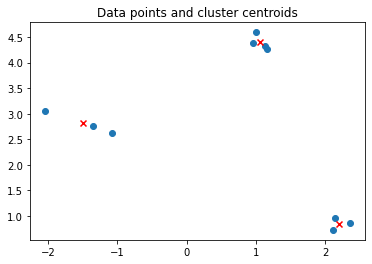

In [32]:
# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(X[:, 0], X[:, -1])

plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="x"
)

plt.title("Data points and cluster centroids")
plt.show()

In [33]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score

print(silhouette_score(X, kmeans.labels_))

0.8810668519873337


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


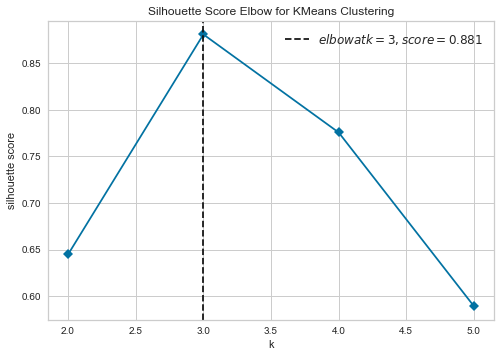

In [35]:
# Import the KElbowVisualizer method
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2, 6), metric="silhouette", timings=False)

# Fit the data and visualize
visualizer.fit(X)
visualizer.poof()

# Example 2

Number Of Clusters:
2
Silhouette score value
0.8373975924849033
Number Of Clusters:
3
Silhouette score value
0.9281994052933474
Number Of Clusters:
4
Silhouette score value
0.6140560142213259
Number Of Clusters:
5
Silhouette score value
0.41937210420325716
Number Of Clusters:
6
Silhouette score value
0.425525328923951
Number Of Clusters:
7
Silhouette score value
0.4298993710522299
Number Of Clusters:
8
Silhouette score value
0.32804932651423757
Number Of Clusters:
9
Silhouette score value
0.3203820986163679
Number Of Clusters:
10
Silhouette score value
0.32515977140196883
Number Of Clusters:
11
Silhouette score value
0.32460700273153736
Number Of Clusters:
12
Silhouette score value
0.3317473101393006
Number Of Clusters:
13
Silhouette score value
0.33539876583366124
Number Of Clusters:
14
Silhouette score value
0.33774521189744006
Number Of Clusters:
15
Silhouette score value
0.3459097100278329
Number Of Clusters:
16
Silhouette score value
0.33537215496338985
Number Of Clusters:
17
Silh

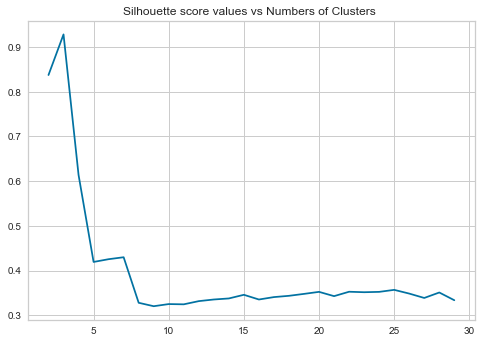

Optimal number of components is:
3


In [46]:
from sklearn import cluster
import numpy as numpy
import sklearn
import matplotlib.pyplot as plt


obs = numpy.concatenate(
    (
        numpy.random.randn(100, 2),
        20 + numpy.random.randn(300, 2),
        -15 + numpy.random.randn(200, 2),
    )
)
silhouette_score_values = list()

NumberOfClusters = range(2, 30)

for i in NumberOfClusters:

    classifier = cluster.KMeans(
        i,
        init="k-means++",
        n_init=10,
        max_iter=300,
        tol=0.0001,
        verbose=0,
        random_state=None,
        copy_x=True,
    )
    classifier.fit(obs)
    labels = classifier.predict(obs)
    print("Number Of Clusters:")
    print(i)
    print("Silhouette score value")
    print(
        sklearn.metrics.silhouette_score(
            obs, labels, metric="euclidean", sample_size=None, random_state=None
        )
    )
    silhouette_score_values.append(
        sklearn.metrics.silhouette_score(
            obs, labels, metric="euclidean", sample_size=None, random_state=None
        )
    )

plt.plot(NumberOfClusters, silhouette_score_values)
plt.title("Silhouette score values vs Numbers of Clusters ")
plt.show()

Optimal_NumberOf_Components = NumberOfClusters[
    silhouette_score_values.index(max(silhouette_score_values))
]
print("Optimal number of components is:")
print(Optimal_NumberOf_Components)